In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("mobile.csv")

In [11]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [13]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
purchased_data = df[['Age','EstimatedSalary','Purchased',]][df['Purchased']==1]

In [15]:
purchased_data

,Age,EstimatedSalary,Purchased
7,32,150000,1
16,47,25000,1
17,45,26000,1
18,46,28000,1
19,48,29000,1
...,...,...,...
393,60,42000,1
395,46,41000,1
396,51,23000,1
397,50,20000,1


In [16]:
not_purchased_data = df[['Age','EstimatedSalary','Purchased',]][df['Purchased']==0]

In [17]:
purchased_data

,Age,EstimatedSalary,Purchased
7,32,150000,1
16,47,25000,1
17,45,26000,1
18,46,28000,1
19,48,29000,1
...,...,...,...
393,60,42000,1
395,46,41000,1
396,51,23000,1
397,50,20000,1


In [18]:
purchased_data

,Age,EstimatedSalary,Purchased
7,32,150000,1
16,47,25000,1
17,45,26000,1
18,46,28000,1
19,48,29000,1
...,...,...,...
393,60,42000,1
395,46,41000,1
396,51,23000,1
397,50,20000,1


In [19]:
not_purchased_data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
377,42,53000,0
380,42,64000,0
387,39,71000,0
394,39,59000,0


In [20]:
not_purchased_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 0 to 398
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              257 non-null    int64
 1   EstimatedSalary  257 non-null    int64
 2   Purchased        257 non-null    int64
dtypes: int64(3)
memory usage: 8.0 KB


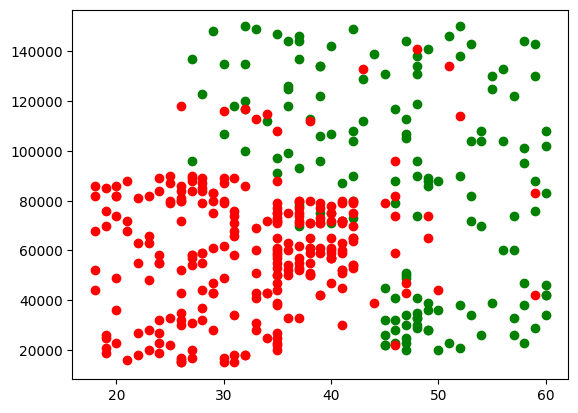

In [21]:
plt.scatter(purchased_data['Age'], purchased_data['EstimatedSalary'],c="green")

plt.scatter(not_purchased_data['Age'], not_purchased_data['EstimatedSalary'],c="red")

In [22]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [23]:
df.min()

Age                   18
EstimatedSalary    15000
Purchased              0
dtype: int64

In [24]:
df.max()

Age                    60
EstimatedSalary    150000
Purchased               1
dtype: int64

In [25]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import sklearn
print(sklearn.__version__)


1.6.1


In [27]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
features_to_scale = ['Age', 'EstimatedSalary']
scaled_value = scalar.fit_transform(df[features_to_scale])
df['norm_Age'] = scaled_value[:,0]
df['norm_Salary'] = scaled_value[:,1]

In [28]:
df

,Age,EstimatedSalary,Purchased,norm_Age,norm_Salary
0,19,19000,0,0.023810,0.029630
1,35,20000,0,0.404762,0.037037
2,26,43000,0,0.190476,0.207407
3,27,57000,0,0.214286,0.311111
4,19,76000,0,0.023810,0.451852
...,...,...,...,...,...
395,46,41000,1,0.666667,0.192593
396,51,23000,1,0.785714,0.059259
397,50,20000,1,0.761905,0.037037
398,36,33000,0,0.428571,0.133333


In [29]:
from sklearn.model_selection import train_test_split

X = df[['norm_Age', 'norm_Salary']]

y = df['Purchased']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train

,norm_Age,norm_Salary
3,0.214286,0.311111
18,0.666667,0.096296
202,0.500000,0.881481
250,0.619048,0.177778
274,0.928571,0.081481
...,...,...
71,0.142857,0.088889
106,0.190476,0.148148
270,0.595238,0.874074
348,0.500000,0.459259


In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 3 to 102
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   norm_Age     320 non-null    float64
 1   norm_Salary  320 non-null    float64
dtypes: float64(2)
memory usage: 7.5 KB


In [33]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 209 to 289
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   norm_Age     80 non-null     float64
 1   norm_Salary  80 non-null     float64
dtypes: float64(2)
memory usage: 1.9 KB


In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3,metric="euclidean")

model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [36]:
model.score(X_train, y_train)*100

92.1875